<h1 style="color:#ffc0cb;font-size:70px;font-family:Georgia;text-align:center;"><strong>Diabetes Problem</strong></h1>

### <b>Author: Nguyen Dang Huynh Chau</b>

<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 📜 Table of Content</strong></h1>

### 1. [Data Preparation](#1)

1.1 [Importing Necessary Libraries and datasets](#1.1)

1.2 [Data Retrieving](#1.2)

1.3 [Data information](#1.3)

<br>

### 2. [Data Cleaning](#2)

2.1 [About This Dataset](#2.1)

2.2 [Drop column](#2.2)

2.3 [Typo check](#2.3)

2.4 [Missing Values](#2.4)

> - 2.4.1 [Check missing values](#2.4.1)
> - 2.4.2 [Fill missing values](#2.4.1)  
>> - 2.4.2.a [Filling missing values for Embarked Feature](#2.4.2.a)
>> - 2.4.2.b [Filling missing values for Cabin Feature](#2.4.2.b)
>> - 2.4.2.c [Filling missing values for Fare Feature](#2.4.2.c)
>> - 2.4.2.d [Filling missing values for Age Feature](#2.4.2.d)

2.5 [Data type](#2.5)

2.6 [Upper Case the content](#2.6)

2.7 [Extra-whitespaces](#2.7)

2.8 [Descriptive statistics for Central Tendency](#2.8)

2.9 [Detect Outlier](#2.9)

2.10 [Save The Intermediate Data](#2.10)

<br>

### 3. [Data Exploration (EDA)](#3)

3.1 [Overall look on target variable](#3.1)

3.2 [Frequency of each corresponiding Target variable type](#3.2)

3.3 [Statistical Overview](#3.3)

3.4 [Correlation Matrix and Heatmap](#3.4)

<br>

### 4. [Feature Engineering](#4)

4.1 [Separating dependent and independent variables](#4.1)

4.2 [Encoding](#4.2)

> - 4.2.1 [Binary Encoding for Name and Ticket Feature:](#4.2.1)
> - 4.2.2 [Binary Encoding for Embarked Feature:](#4.2.2)

4.3 [Separating dependent and independent variables](#4.3)

4.4 [Splitting the training data](#4.4)

4.5 [Feature Scaling](#4.5)

<br>

### 5. [Model Building](#5) 

5.1 [Logistic Regression](#5.1)

> - 5.1.1 [Logistic Regression without GridSearch](#5.1.1)
>> - 5.1.1.a [Train model](#5.1.1.a) 
>> - 5.1.1.b [Evaluating a classification model](#5.1.1.b) 
> - 5.1.2 [Logistic Regression with GridSearch](#5.1.2)
>> - 5.1.1.a [Train model](#5.1.1.a) 
>> - 5.1.1.b [Evaluating a classification model](#5.1.1.b) 


5.2 [Random Forest](#5.2)
> - 5.2.1 [Random Forest with Pipelines](#5.2.1)
>> - 5.2.1.a [Train model](#5.2.1.a) 
>> - 5.2.1.b [Evaluating a classification model](#5.2.1.b) 
> - 5.2.2 [Combining GridSearch+Random Forest with Pipelines](#5.2.2)
>> - 5.2.1.a [Train model](#5.2.1.a) 
>> - 5.2.1.b [Evaluating a classification model](#5.2.1.b)

5.3 [K-Nearest Neighbors with GridSearchCV](#5.3)
>> - 5.3.1 [Train model](#5.2.1.a) 
>> - 5.3.2 [Evaluating a classification model](#5.2.1.b)

5.4 [Ensemble Learning](#5.4)
> - 5.4.1 [Bagging Classifier](#5.4.1)
>> - 5.4.1.a [Train model](#5.4.1.a) 
>> - 5.4.1.b [Evaluating a classification model](#5.4.1.b) 
>> - 5.4.1.c [Compare Pro and Cons](#5.4.1.c) 
> - 5.4.2 [AdaBoost Classifier](#5.4.2)
>> - 5.4.1.a [Train model](#5.4.1.a) 
>> - 5.4.1.b [Evaluating a classification model](#5.4.1.b) 
>> - 5.4.1.c [Compare Pro and Cons](#5.4.1.b) 

5.5 [Extra Trees Classifier](#5.5)
>> - 5.5.1 [Train model](#5.5.1) 
>> - 5.5.2 [Evaluating a classification model](#5.5.2) 

5.6 [Random Forest](#5.6)


<br>

### 6. [Conculsions](#6)

<br>

### 7. [References](#7)

<br>

### 8. [Appendix](#8)

<hr>

<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> ✍️ 1. Data Preparation</strong></h1>

<a id="1.1"></a>
# ✴️ 1.1 Importing Necessary Libraries and datasets

In [1]:
# Install a conda package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install missingno
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install xgboost
!{sys.executable} -m pip install statsmodels
!{sys.executable} -m pip install imbalanced-learn
!{sys.executable} -m pip install category_encoders


# work with data in tabular representation
from datetime import time
import pandas as pd
# round the data in the correlation matrix
import numpy as np
import os


# Modules for data visualization
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

# encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import category_encoders as ce

# import LogisticRegression model in python. 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

# for saving the pipeline
import joblib

# from Scikit-learn
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, Binarizer

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

# Ensure that our plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows
%matplotlib inline

# overwrite the style of all the matplotlib graphs
sns.set()

# ignore DeprecationWarning Error Messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# check the version of the packages
print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)
! python --version

Numpy version:  1.20.3
Pandas version:  1.3.4
Python 3.9.7


<a id="1.2"></a>
# 📲 1.2 Data Retrieving
***
In order to load data properly, the data in csv file have to be examined carefully. First of all, all the categories are seperated by the "," and strip the extra-whitespaces at the begin by setting "skipinitialspace = True".

In [3]:
## Importing the datasets
df = pd.read_csv("Data/diabetes.csv", delimiter=',', skipinitialspace = True)

df.columns = df.columns.str.replace(' ', '') #strip the extra-whitespaces out

print("The shape of the ORGINAL data is (row, column):", str(df.shape))

# drop Unnamed, it is just a number given to identify each house
df.head(3)

The shape of the ORGINAL data is (row, column): (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


<a id="1.3"></a>
# 🔈 1.3 Data Information
*****

In [4]:
print ("The shape of the train data is (row, column):"+ str(df.shape))
print (df.info())

The shape of the train data is (row, column):(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 🧹 2. Data Cleaning</strong></h1>

<a id="2.1"></a>
# 📚 2.1 Missing values
****
Missing values can cause a lot of unexpected problems such as not reducing the power of a model, but also negatively affect the performance of the studies and analysis of that data. Hence, it is important to deal with missing data. First step is to check the number of missing values of each column and fill in with the appropriate values. 

Missing values in the dataframe in descending: 
 Empty DataFrame
Columns: [Total, Percent]
Index: []


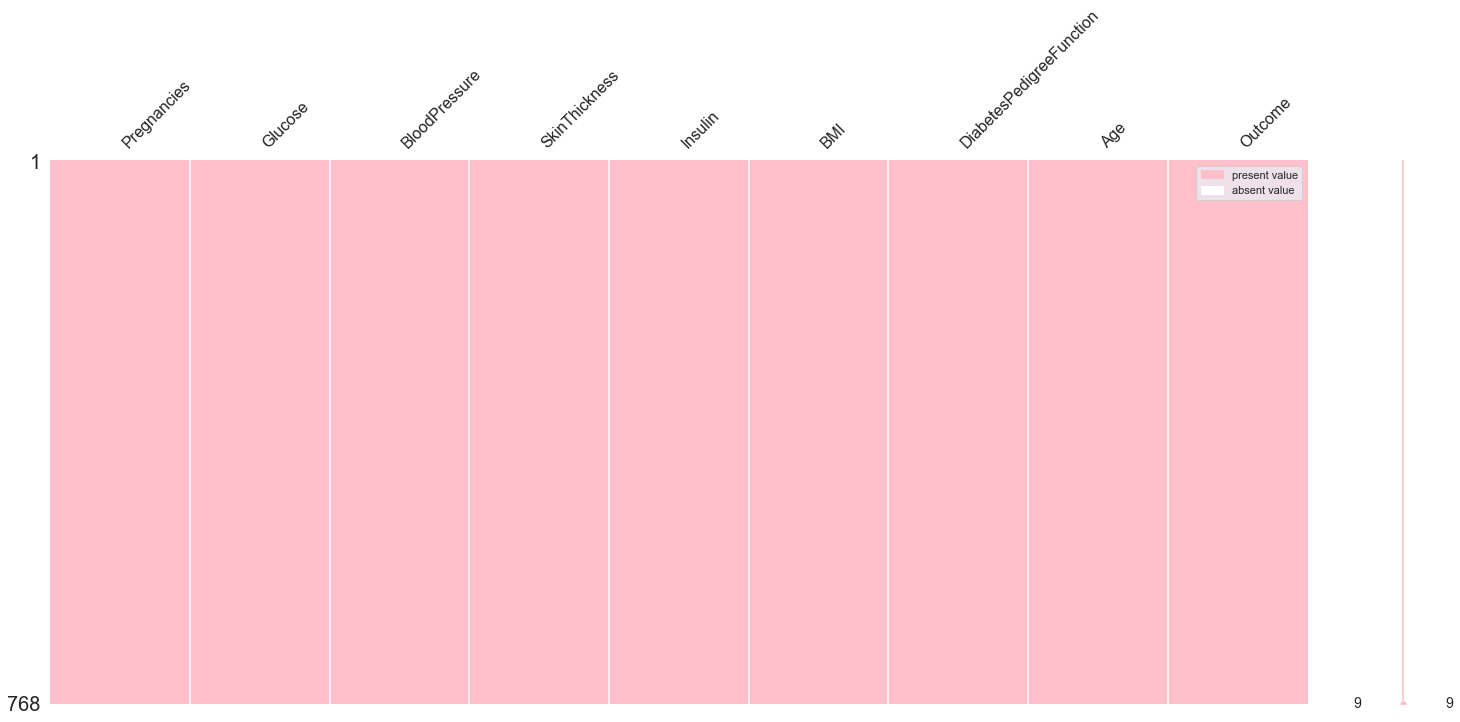

In [5]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2)[
        round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# display missing values in descending
print("Missing values in the dataframe in descending: \n", missing_percentage(df).sort_values(by='Total', ascending=False))

# visualize where the missing values are located
msno.matrix(df, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.show()

### ------> OBSERVATION
*****
There is no missing data

<a id="2.2"></a>
# 📊 2.2 Descriptive statistics for Central Tendency

In [6]:
# see the static of all numerical column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


<AxesSubplot:>

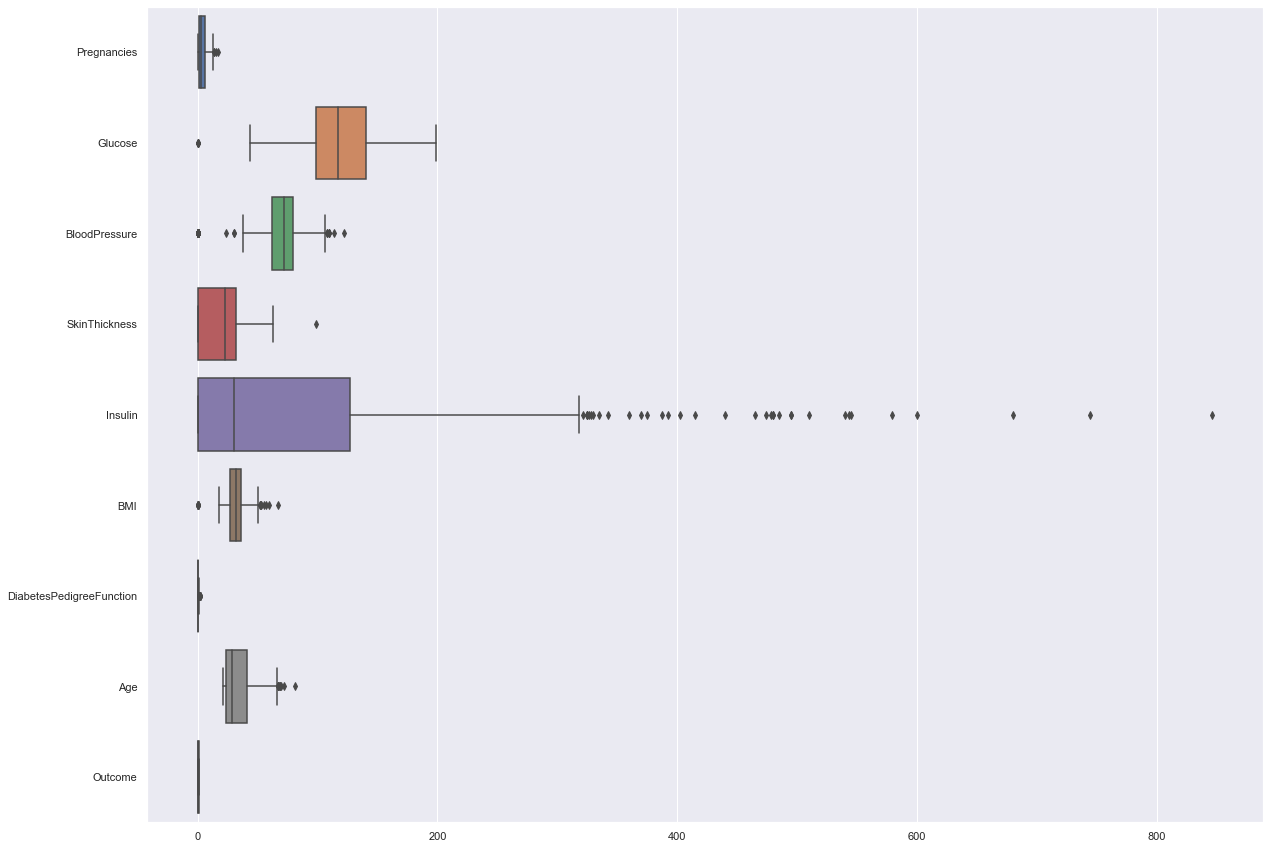

In [7]:
plt.rcParams['figure.figsize'] = [20, 15]
# plot the boxplot to see the outlier of each numerical column
sns.boxplot(data=df,orient="h")

<a id="2.3"></a>
# 💢 2.3 Detect Outlier

## Pregnancies

<AxesSubplot:>

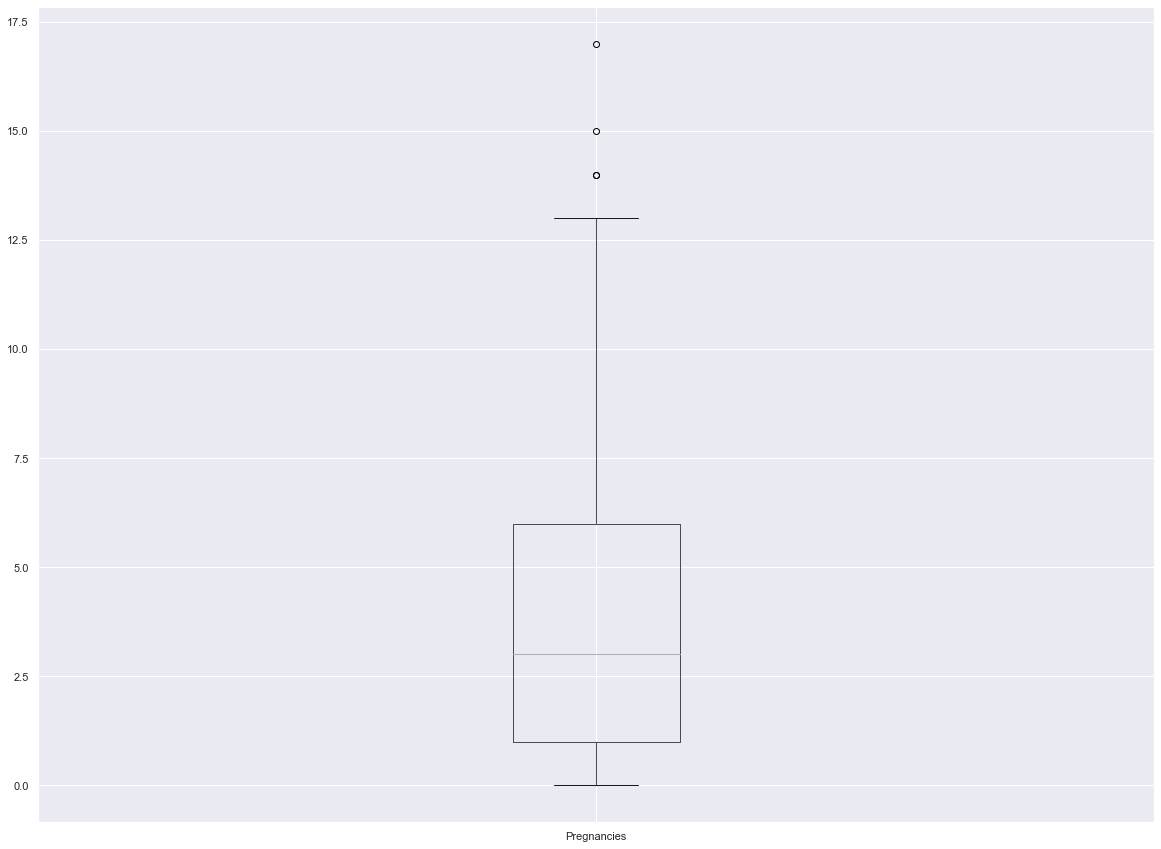

In [12]:
df.boxplot('Pregnancies')

## Glucose

<AxesSubplot:>

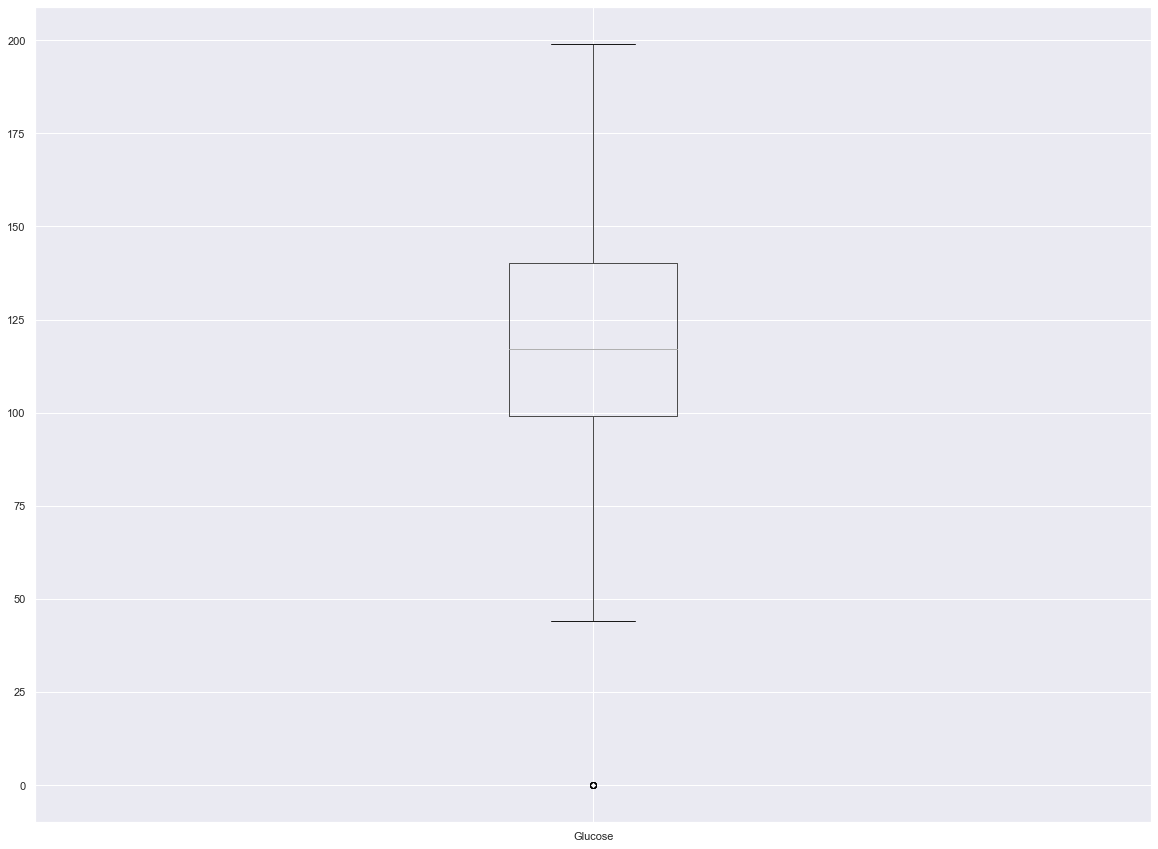

In [13]:
df.boxplot('Glucose')

## BloodPressure

<AxesSubplot:>

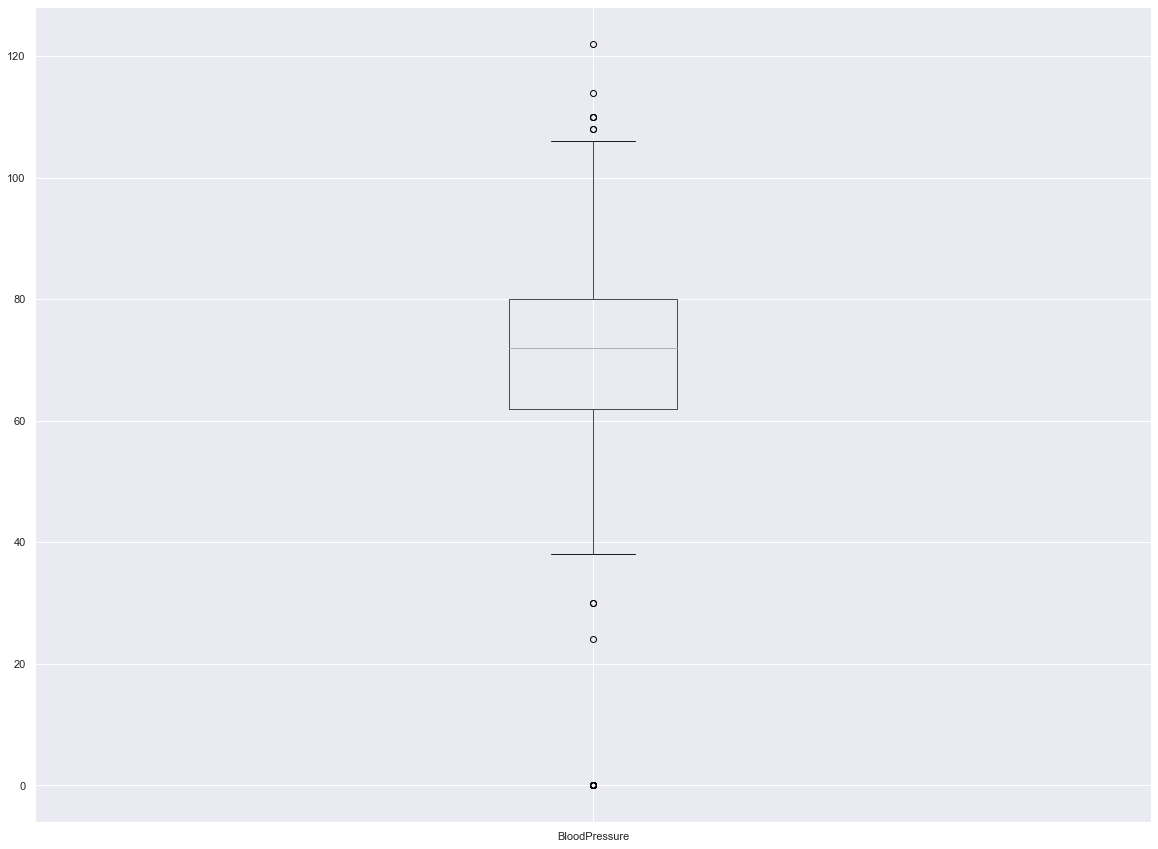

In [14]:
df.boxplot('BloodPressure')

In [16]:
q_low = df["BloodPressure"].quantile(0.01)
q_hi  = df["BloodPressure"].quantile(0.99)

df_filtered = df[(df["BloodPressure"] > q_hi)| (df["BloodPressure"] < q_low)]
df_filtered

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
43,9,171,110,24,240,45.4,0.721,54,1
84,5,137,108,0,0,48.8,0.227,37,1
106,1,96,122,0,0,22.4,0.207,27,0
177,0,129,110,46,130,67.1,0.319,26,1
362,5,103,108,37,0,39.2,0.305,65,0
549,4,189,110,31,0,28.5,0.680,37,0
691,13,158,114,0,0,42.3,0.257,44,1


## SkinThickness

<AxesSubplot:>

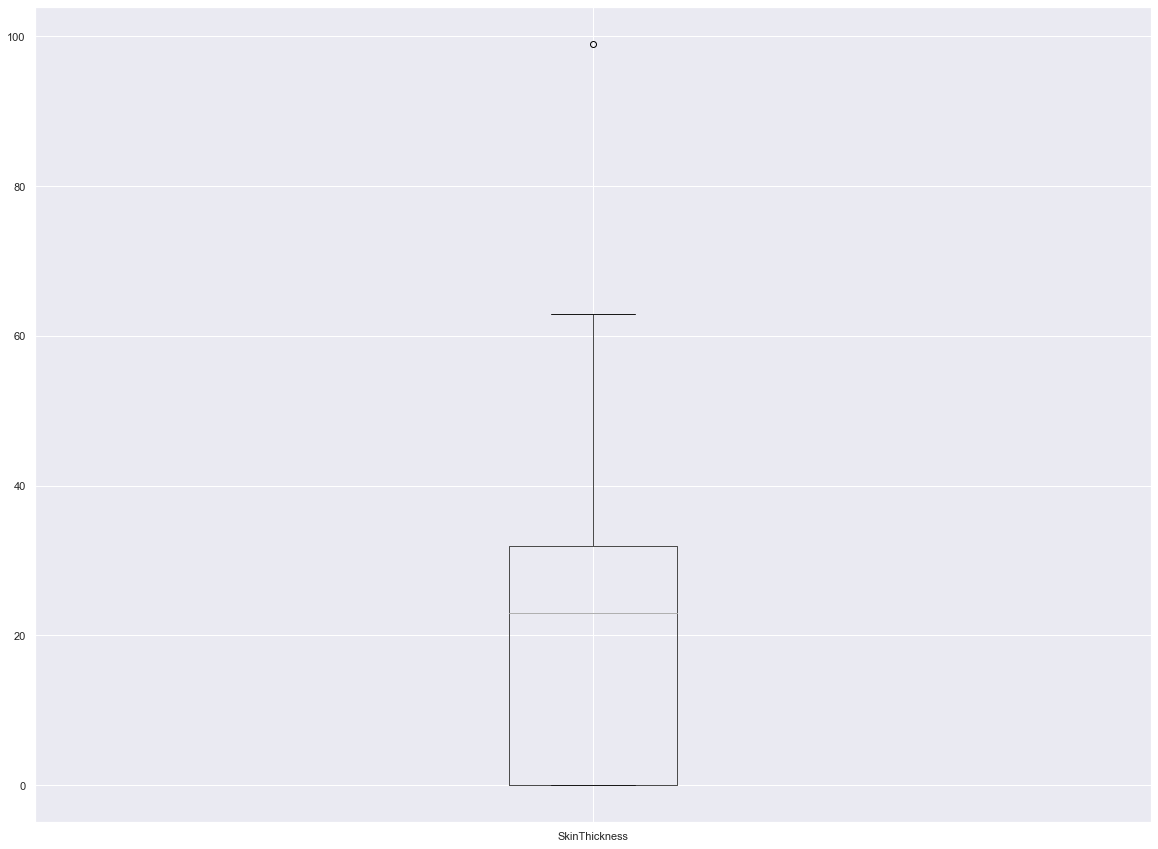

In [15]:
df.boxplot('SkinThickness')

In [17]:
q_low = df["SkinThickness"].quantile(0.01)
q_hi  = df["SkinThickness"].quantile(0.99)

df_filtered = df[(df["SkinThickness"] > q_hi)| (df["SkinThickness"] < q_low)]
df_filtered

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
57,0,100,88,60,110,46.8,0.962,31,0
86,13,106,72,54,0,36.6,0.178,45,0
120,0,162,76,56,100,53.2,0.759,25,1
211,0,147,85,54,0,42.8,0.375,24,0
275,2,100,70,52,57,40.5,0.677,25,0
445,0,180,78,63,14,59.4,2.420,25,1
532,1,86,66,52,65,41.3,0.917,29,0
579,2,197,70,99,0,34.7,0.575,62,1


## Insulin

<AxesSubplot:>

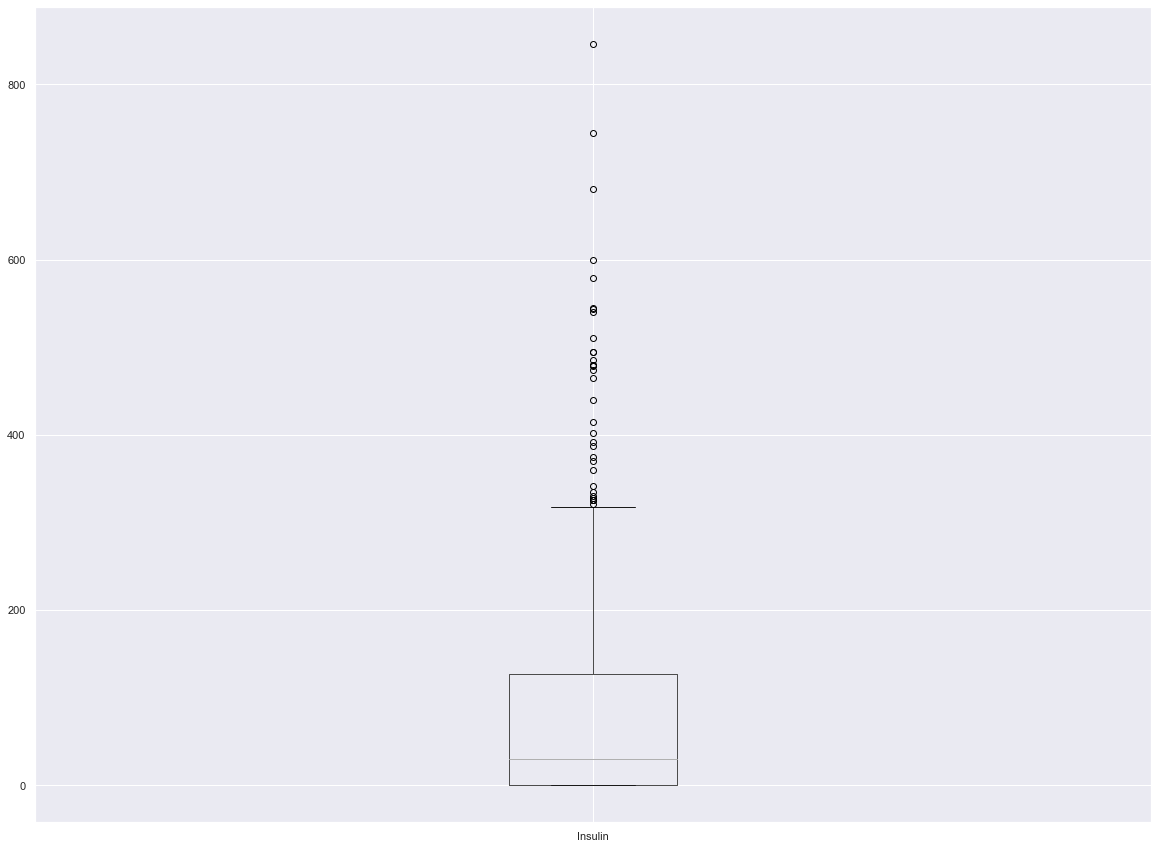

In [18]:
df.boxplot('Insulin')

In [19]:
q_low = df["Insulin"].quantile(0.01)
q_hi  = df["Insulin"].quantile(0.99)

df_filtered = df[(df["Insulin"] > q_hi)| (df["Insulin"] < q_low)]
df_filtered

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
228,4,197,70,39,744,36.7,2.329,31,0
247,0,165,90,33,680,52.3,0.427,23,0
286,5,155,84,44,545,38.7,0.619,34,0
409,1,172,68,49,579,42.4,0.702,28,1
584,8,124,76,24,600,28.7,0.687,52,1
655,2,155,52,27,540,38.7,0.240,25,1


In [ ]:
df.boxplot('Pregnancies')

In [ ]:
df.boxplot('Pregnancies')

In [ ]:
df.boxplot('Pregnancies')